#### Previsione del prezzo di un'azione con regressione lineare e support vector machine

https://www.youtube.com/watch?v=EYnC4ACIt2g&ab_channel=ComputerScience

In [1]:

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import yfinance as yf


importiamo i dati

In [2]:
start_date = '2014-5-31'
end_date = '2024-5-31'
df = yf.download('AMZN', start_date, end_date) 
#^GSPC

[*********************100%%**********************]  1 of 1 completed


In [3]:
len(df)

2517

In [4]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-06-02,15.629500,15.630000,15.350000,15.442000,15.442000,44068000
2014-06-03,15.287500,15.396000,15.253500,15.359500,15.359500,47584000
2014-06-04,15.342500,15.475000,15.192000,15.339000,15.339000,42142000
2014-06-05,15.405000,16.396999,15.345000,16.178499,16.178499,155934000
2014-06-06,16.250000,16.544001,16.246500,16.483500,16.483500,104880000
2014-06-09,16.578501,16.650000,16.282499,16.375000,16.375000,64244000
2014-06-10,16.382500,16.775000,16.375000,16.620501,16.620501,73268000
2014-06-11,16.799999,17.035999,16.694000,16.760000,16.760000,88736000
2014-06-12,16.777500,16.777500,16.233000,16.295500,16.295500,85526000


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-23,183.660004,184.759995,180.080002,181.050003,181.050003,33670200
2024-05-24,181.649994,182.440002,180.300003,180.750000,180.750000,27434100
2024-05-28,179.929993,182.240005,179.490005,182.149994,182.149994,29927000
2024-05-29,181.699997,184.080002,181.550003,182.020004,182.020004,32009300
2024-05-30,181.309998,181.339996,178.360001,179.320007,179.320007,29249200


Selezioniamo la colonna Adj Close

In [6]:
df = df[['Adj Close']] # con 2 quadre otteniamo un dataframe, se mettiamo una sola quadra otteniamo una serie (piccolo tip)

In [7]:
len(df)

2517

In [8]:
df.head()

,Adj Close
Date,
2014-06-02,15.442000
2014-06-03,15.359500
2014-06-04,15.339000
2014-06-05,16.178499
2014-06-06,16.483500


In [9]:
# Numero di giorni nel futuro che si vogliono prevedere
forecast_out = 1

In [10]:
# Creiamo una colonna con la variabile da prevedere
df.loc[:,'Prediction'] = df['Adj Close'].shift(-1).copy()

C:\Users\utente\AppData\Local\Temp\ipykernel_5196\3900558744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Prediction'] = df['Adj Close'].shift(-1).copy()


In [11]:
df.head()

,Adj Close,Prediction
Date,,
2014-06-02,15.442000,15.359500
2014-06-03,15.359500,15.339000
2014-06-04,15.339000,16.178499
2014-06-05,16.178499,16.483500
2014-06-06,16.483500,16.375000


In [12]:
df.tail()

,Adj Close,Prediction
Date,,
2024-05-23,181.050003,180.750000
2024-05-24,180.750000,182.149994
2024-05-28,182.149994,182.020004
2024-05-29,182.020004,179.320007
2024-05-30,179.320007,NaN


#### Previsione prossimi 10 giorni

In [13]:
# Stabiliamo quanti "n" giorni in avanti vogliamo prevedere
forecast_out = 10
df.loc[:,'Prediction'] = df['Adj Close'].shift(-forecast_out)

In [14]:
df.head()

,Adj Close,Prediction
Date,,
2014-06-02,15.442000,16.381001
2014-06-03,15.359500,16.281000
2014-06-04,15.339000,16.719000
2014-06-05,16.178499,16.350000
2014-06-06,16.483500,16.209999


In [15]:
df.tail(15)

,Adj Close,Prediction
Date,,
2024-05-09,189.500000,181.050003
2024-05-10,187.479996,180.750000
2024-05-13,186.570007,182.149994
2024-05-14,187.070007,182.020004
2024-05-15,185.990005,179.320007
2024-05-16,183.630005,NaN
2024-05-17,184.699997,NaN
2024-05-20,183.539993,NaN
2024-05-21,183.149994,NaN


Creiamo un data set indipendente (X), trasformando il df in un array
X = np.array(df.drop(['Prediction'],1))

In [16]:
X = np.array(df['Adj Close']).reshape(-1,1) # array colonna di prezzi di chiusura
X

array([[ 15.44200039],
       [ 15.35949993],
       [ 15.33899975],
       ...,
       [182.1499939 ],
       [182.02000427],
       [179.32000732]])

In [17]:
# Eliminiamo le ultime "n" righe
X = X[:-forecast_out]

In [18]:
print(X)
# attenzione, abbiamo creato una lista di liste

[[ 15.44200039]
 [ 15.35949993]
 [ 15.33899975]
 ...
 [186.57000732]
 [187.07000732]
 [185.99000549]]


In [19]:
len(X)

2507

In [20]:
# Creiamo il data set dipendente (y)
# Creiamo un altro array (tutti i valori compresi gli NaN)
y = np.array(df['Prediction'])
print(y)

[16.38100052 16.28100014 16.71899986 ...         nan         nan
         nan]


In [21]:
# Eliminiamo gli NaN
y = y[:-forecast_out]
print(y)

[ 16.38100052  16.28100014  16.71899986 ... 182.1499939  182.02000427
 179.32000732]


In [22]:
len(y)

2507

Creiamo i due data set di addestramento e prova (train, test)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
x_train

array([[ 96.19999695],
       [ 75.01399994],
       [ 18.61249924],
       ...,
       [ 87.27649689],
       [163.43049622],
       [ 16.02050018]])

In [25]:
y_train

array([100.25      ,  84.66100311,  18.77799988, ...,  87.02400208,
       149.99299622,  15.91650009])

### Support Vector Regressor

In [26]:
svr_rbf = SVR(kernel='rbf', C = 1e3, gamma = 0.1)

In [27]:
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

Testiamo il modello. L'indice di capacità del modello è il coefficiente di determinazione R^2 della previsione,  che indica la percentuale di variabilità nella variable dipendente spiegata dal modello. 

Il valore di R^2 è compreso fra un minimo di 0 e un massimo di 1

In [28]:
svm_confindence = svr_rbf.score(x_test, y_test)
print('svm_confindence: ', svm_confindence)

svm_confindence:  0.9836751452960726


### Modello di regressione lineare

In [29]:
lr = LinearRegression()

In [30]:
lr.fit(x_test, y_test)

LinearRegression()

Testiamo il modello. L'indice di capacità del modello è il coefficiente di determinazione R^2 della previsione, che indica la percentuale di variabilità nella variable dipendente spiegata dal modello.

Il valore di R^2 è compreso fra un minimo di 0 e un massimo di 1

In [31]:
lr_confindence = lr.score(x_test, y_test)
print('lr_confindence: ', lr_confindence)

lr_confindence:  0.9843891051223528


Creiamo la previsione degli ultimi 10 valori

In [32]:
x_forecast = np.array(df['Adj Close'])[-forecast_out:].reshape(-1,1)
print(x_forecast)

[[183.63000488]
 [184.69999695]
 [183.53999329]
 [183.1499939 ]
 [183.13000488]
 [181.05000305]
 [180.75      ]
 [182.1499939 ]
 [182.02000427]
 [179.32000732]]


Previsione dei prossimi n valori con il modello di regressione lineare

In [33]:
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

[184.16521364 185.23293204 184.07539331 183.68622265 183.66627611
 181.59069416 181.29132859 182.68834759 182.55863418 179.86437456]


Previsione dei prossimi n valori con il modello support vector machine

In [34]:
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[178.23190538 179.20562269 178.02468996 177.08899654 177.04458831
 183.11175922 184.6387827  177.05149109 177.50658738 181.2551149 ]


Qual è la previsione migliore?

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [36]:
lr_rmse = sqrt(mean_squared_error(x_forecast, lr_prediction))
print(lr_rmse)

0.5379512618329474


In [37]:
svm_rmse = sqrt(mean_squared_error(x_forecast, svm_prediction))
print(svm_rmse)

4.826986172358702


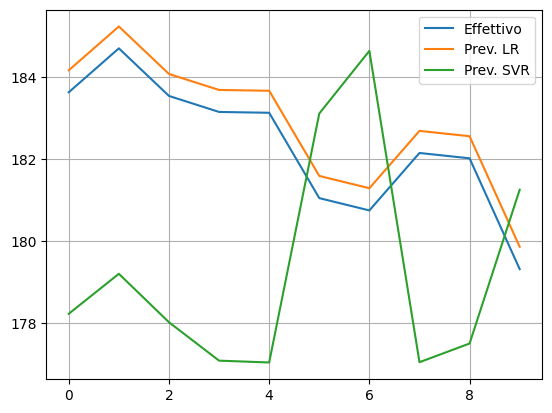

In [38]:
plt.plot(x_forecast, label = 'Effettivo')
plt.plot(lr_prediction, label = 'Prev. LR')
plt.plot(svm_prediction, label = 'Prev. SVR')
plt.grid(True)
plt.legend();


#### Previsione del prezzo di Ethereum con SVR
https://www.youtube.com/watch?v=HiDEAWdAif0&ab_channel=ComputerScience

In [39]:
from datetime import date, datetime
plt.style.use('fivethirtyeight')
#import pandas_datareader.data as web
import yfinance as yf
import pandas as pd


In [40]:
start_date = '2019-05-31'
end_date = '2024-05-31'
#end_date = datetime.today()

In [41]:
df = yf.download('ETH-USD', start_date, end_date) 

[*********************100%%**********************]  1 of 1 completed


In [42]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-31,256.015259,268.659943,249.111847,268.113556,268.113556,11255023515
2019-06-01,268.433350,273.557983,263.524597,265.391266,265.391266,9942869852
2019-06-02,265.512726,272.807220,265.041870,270.225525,270.225525,8744111713
2019-06-03,270.088562,270.334106,251.262192,252.607925,252.607925,9375712917
2019-06-04,252.511642,252.511642,236.127213,241.338791,241.338791,10132549747


In [43]:
future_days = 5

In [44]:
# Creiamo una  nuova colonna con i prezzi futuri

In [45]:
df[str(future_days) + '_Day_Price_Forecast'] = df[['Close']].shift(-future_days)

In [46]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,5_Day_Price_Forecast
Date,,,,,,,
2019-05-31,256.015259,268.659943,249.111847,268.113556,268.113556,11255023515,247.051010
2019-06-01,268.433350,273.557983,263.524597,265.391266,265.391266,9942869852,249.474335
2019-06-02,265.512726,272.807220,265.041870,270.225525,270.225525,8744111713,250.930359
2019-06-03,270.088562,270.334106,251.262192,252.607925,252.607925,9375712917,245.738098
2019-06-04,252.511642,252.511642,236.127213,241.338791,241.338791,10132549747,233.086700
2019-06-05,241.497040,248.138138,239.983459,247.051010,247.051010,8548917062,247.520126
2019-06-06,246.925247,249.944504,238.501114,249.474335,249.474335,8265146806,245.781830
2019-06-07,249.335281,254.352295,246.597900,250.930359,250.930359,8379534528,260.903290
2019-06-08,251.249313,252.377396,243.229111,245.738098,245.738098,7225996863,256.168793


In [47]:
df.tail(7)

,Open,High,Low,Close,Adj Close,Volume,5_Day_Price_Forecast
Date,,,,,,,
2024-05-24,3776.992432,3825.122559,3631.990234,3726.934570,3726.934570,22257061429,3763.196533
2024-05-25,3726.975586,3776.006592,3710.528320,3749.236572,3749.236572,10000027764,3746.849609
2024-05-26,3749.179932,3879.470703,3732.022949,3825.897461,3825.897461,14650794791,NaN
2024-05-27,3826.127197,3973.556396,3821.930420,3892.006836,3892.006836,18949181813,NaN
2024-05-28,3892.096924,3924.895752,3771.213867,3840.256348,3840.256348,19846044324,NaN
2024-05-29,3840.235107,3880.648438,3742.041260,3763.196533,3763.196533,17411416736,NaN
2024-05-30,3763.357666,3823.643311,3702.263672,3746.849609,3746.849609,15065849797,NaN


Creiamo il data set per la previsione

In [48]:
X = np.array(df[['Close']])
X = X[:df.shape[0] - future_days]

In [49]:
df.shape

(1827, 7)

In [50]:
df.shape[0]

1827

In [51]:
len(X)

1822

In [52]:
y = np.array(df[str(future_days) + '_Day_Price_Forecast'])

In [53]:
y = y[:-future_days]
print(y)

[ 247.05101013  249.47433472  250.93035889 ... 3840.25634766 3763.1965332
 3746.84960938]


Creiamo il data set di addestramento e test

In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [55]:
svr_rbf = SVR(kernel='rbf', C = 1e3, gamma = 0.00001)
svr_rbf.fit(x_train,y_train)

SVR(C=1000.0, gamma=1e-05)

In [56]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf confidence score is: ', svr_rbf_confidence)

svr_rbf confidence score is:  0.9733346834876881


In [57]:
svm_prediction = svr_rbf.predict(x_test)

In [58]:
print(y_test)

[2224.57885742 2303.82470703 2519.11621094 1279.57568359  185.11923218
 1657.0592041  2355.83642578 1936.40344238 3726.93457031  211.54537964
 1791.70227051 1911.64611816  190.34257507 1720.57751465  207.40830994
 4439.35791016  387.60217285  234.41616821  202.94909668  158.41244507
 1134.54101562 2435.10498047 2092.46679688 2453.91308594 1216.90124512
 2052.71386719 1291.33764648  241.51022339 1492.60876465  382.63262939
 3418.35864258 1772.78564453 1327.68017578 1287.22106934  316.65725708
 1256.52661133 3952.29394531 1876.05969238  113.94274902 1332.83557129
  269.43179321  235.85119629 3139.80517578 2984.72753906  243.52529907
 1785.57653809 2113.60546875 2268.6472168  3834.828125    175.36567688
 1207.11218262  122.60388947 1215.60253906 1827.71289062  244.91145325
  243.01596069 1382.27404785 3147.28857422 1564.7076416  2772.05566406
 1981.33654785 1539.61242676 3062.72875977  259.89471436 1121.57092285
  171.62942505 4730.38427734 1826.93884277 1857.74194336 1196.77124023
 3122.

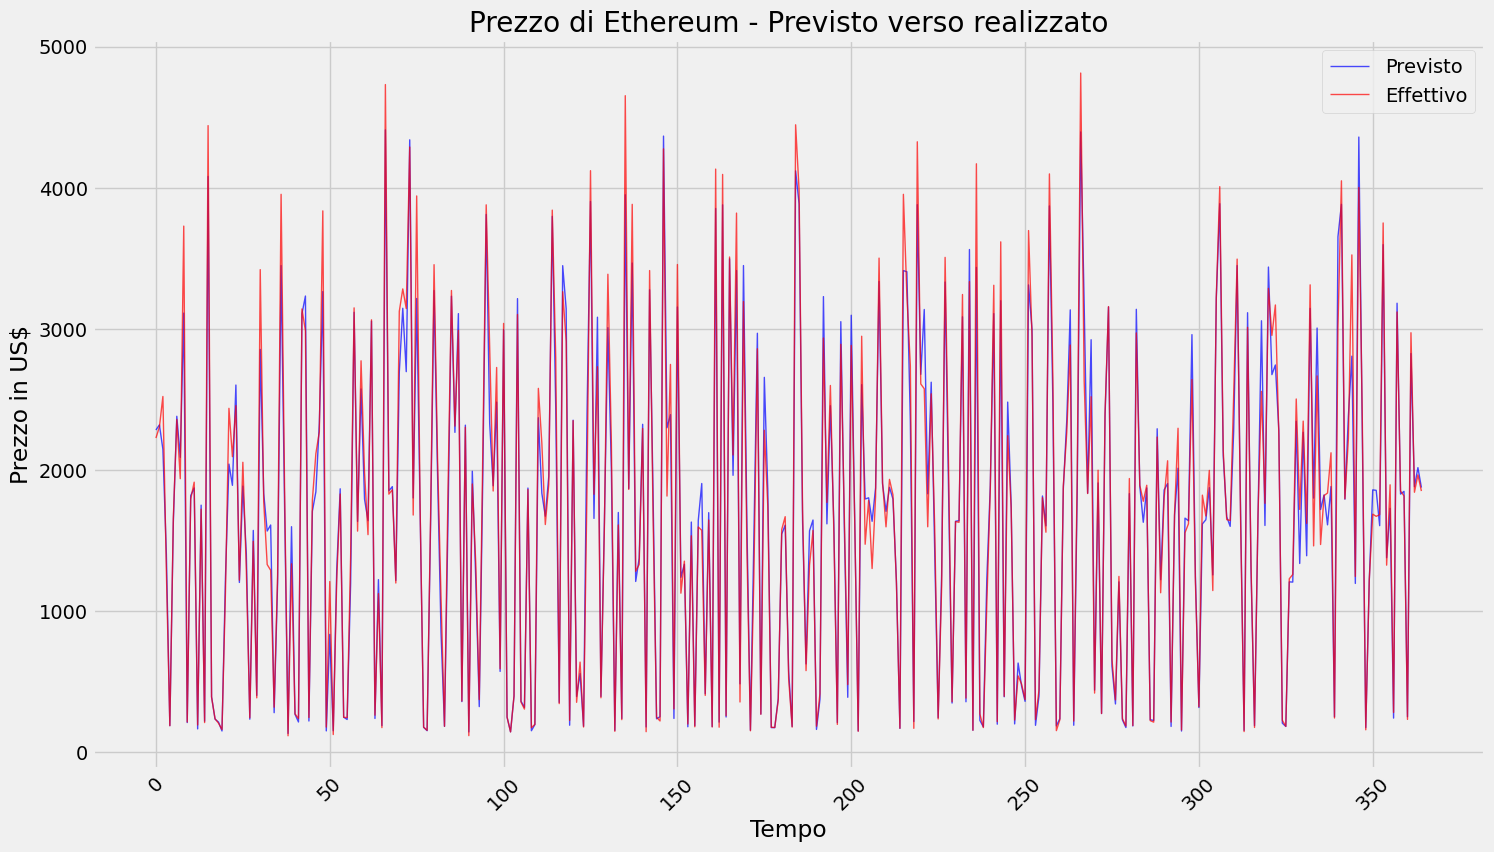

In [59]:
plt.figure(figsize=(16,9))
plt.plot(svm_prediction, label = 'Previsto', linewidth = '1', color ='b', alpha = .7)
plt.plot(y_test, label = 'Effettivo', linewidth = '1', color ='r', alpha = .7)
plt.title('Prezzo di Ethereum - Previsto verso realizzato')
plt.ylabel('Prezzo in US$')
plt.xlabel('Tempo')
plt.legend()
plt.xticks(rotation = 45)
plt.show();
